# Section 1

In [13]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.7 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
coins = ("BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD")

train_start = "2023-08-01"
train_end = "2024-08-01"
test_start = "2024-08-01"
test_end = "2024-12-01"

start_date = "2023-08-01"
end_date = "2024-12-01"

In [51]:
def get_coins_data(coins, start, end):
    data = yf.download(coins, start=start, end=end, interval="1d")
    data = data.dropna()
    return data

In [52]:
data = get_coins_data(coins, start_date, end_date)
data

[*********************100%***********************]  4 of 4 completed


Price            Close                                             High  \
Ticker         BNB-USD       BTC-USD      ETH-USD   XRP-USD     BNB-USD   
Date                                                                      
2023-08-01  247.505020  29675.732422  1871.792114  0.707211  247.505020   
2023-08-02  240.494644  29151.958984  1839.089722  0.685195  248.511551   
2023-08-03  241.061523  29178.679688  1835.136475  0.664135  241.583252   
2023-08-04  241.476013  29074.091797  1827.712891  0.635539  243.155472   
2023-08-05  242.959351  29042.126953  1834.987915  0.628423  243.027725   
...                ...           ...          ...       ...         ...   
2024-11-26  613.587280  91985.320312  3326.517334  1.401323  645.292969   
2024-11-27  644.948486  95962.531250  3657.249268  1.472812  646.851807   
2024-11-28  654.361633  95652.468750  3579.811523  1.541343  663.021973   
2024-11-29  654.809753  97461.523438  3593.494385  1.796731  663.324707   
2024-11-30  654.329163  96449.054688  3705.705322  1.944121  676.924438   

Price                                                   Low                \
Ticker           BTC-USD      ETH-USD   XRP-USD     BNB-USD       BTC-USD   
Date                                                                        
2023-08-01  29675.732422  1873.029907  0.707211  238.530243  28657.023438   
2023-08-02  29987.998047  1877.511475  0.707087  236.891769  28946.509766   
2023-08-03  29375.707031  1856.407593  0.686761  238.509644  28959.488281   
2023-08-04  29302.078125  1847.912231  0.666442  240.452286  28885.335938   
2023-08-05  29102.464844  1836.464844  0.635532  240.090393  28957.796875   
...                  ...          ...       ...         ...           ...   
2024-11-26  94991.750000  3461.292969  1.456542  600.991272  90770.812500   
2024-11-27  97361.179688  3687.009033  1.518370  608.621460  91778.664062   
2024-11-28  96650.203125  3664.878174  1.542370  641.617065  94677.351562   
2024-11-29  98693.171875  3647.264404  1.811531  649.163208  95407.882812   
2024-11-30  97499.343750  3739.934814  1.954907  648.892395  96144.218750   

Price                                    Open                             \
Ticker          ETH-USD   XRP-USD     BNB-USD       BTC-USD      ETH-USD   
Date                                                                       
2023-08-01  1817.920776  0.683532  241.128052  29230.873047  1856.190186   
2023-08-02  1822.348267  0.680232  247.490311  29704.146484  1873.468140   
2023-08-03  1825.347778  0.658851  240.509979  29161.812500  1838.897949   
2023-08-04  1817.413818  0.630304  241.042862  29174.382812  1834.890503   
2023-08-05  1824.807983  0.612637  241.489670  29075.388672  1827.798584   
...                 ...       ...         ...           ...          ...   
2024-11-26  3255.542969  1.294805  636.639709  93087.281250  3412.950928   
2024-11-27  3303.567871  1.357346  613.587280  91978.140625  3326.029053   
2024-11-28  3531.870605  1.434183  644.948486  95954.945312  3656.609619   
2024-11-29  3538.446777  1.527908  654.361755  95653.953125  3579.910645   
2024-11-30  3572.254150  1.770554  654.809753  97468.812500  3593.598145   

Price                     Volume                                         
Ticker       XRP-USD     BNB-USD      BTC-USD      ETH-USD      XRP-USD  
Date                                                                     
2023-08-01  0.698503   830645013  18272392391   7634860636   1438067858  
2023-08-02  0.707087   650256385  19212655598   6448512422   1132335650  
2023-08-03  0.685180   400525696  12780357746   4710581074   1414576525  
2023-08-04  0.664088   370373499  12036639988   4861242484   1342066974  
2023-08-05  0.635532   300760369   6598366353   2866049749   1142144189  
...              ...         ...          ...          ...          ...  
2024-11-26  1.415367  2637257322  91656519855  39902959158   9378581138  
2024-11-27  1.401312  2393610865  71133452438  43383987191   7766

In [53]:
train_data = data.loc[train_start:train_end].Close
test_data = data.loc[test_start:test_end].Close

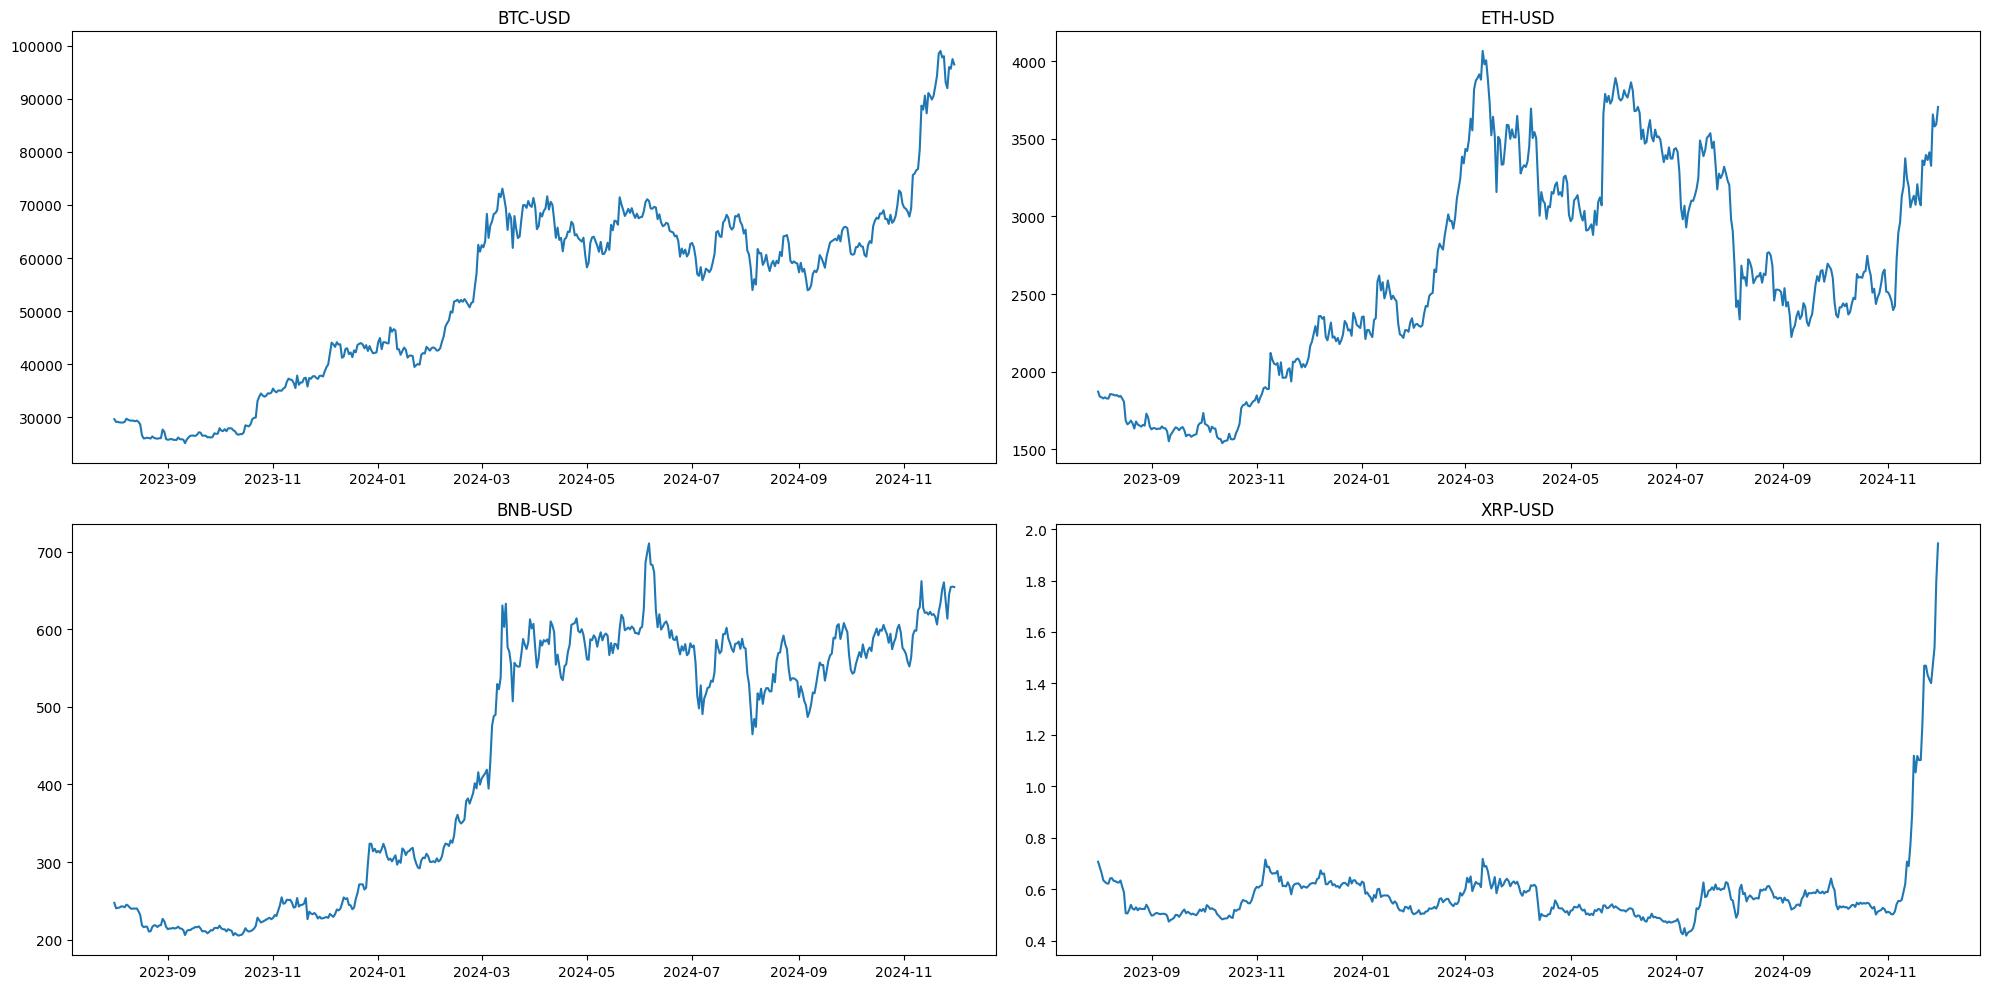

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes[0, 0].plot(data["BTC-USD"])
axes[0, 0].set_title("BTC-USD")

axes[0, 1].plot(data["ETH-USD"])
axes[0, 1].set_title("ETH-USD")

axes[1, 0].plot(data["BNB-USD"])
axes[1, 0].set_title("BNB-USD")

axes[1, 1].plot(data["XRP-USD"])
axes[1, 1].set_title("XRP-USD")

fig.tight_layout()
plt.show()

# Section 2

## Part 1

In [14]:
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statistics import mean
from arch import arch_model

In [15]:
def mean_forecast(model_type, returns: pd.Series, window):
    volatilities = []
    data = returns.copy(deep=True).to_list()

    for i in range(window):
        model = arch_model(data, vol=model_type, p=1, q=1, rescale=True)
        model_fit = model.fit(disp="off", show_warning=False)
        forecast = model_fit.forecast(horizon=1)
        forecast = np.sqrt(forecast.variance.values[-1, :][0])
        volatilities.append(forecast)
        data.append(forecast)

    return mean(volatilities), volatilities

In [16]:
returns = 100 * train_data.pct_change().dropna()
windows = [7, 30]
columns = pd.MultiIndex.from_tuples(
    [(coin, window) for coin, window in list(itertools.product(coins, windows))]
)
indexes = ["Garch", "EGarch", "FIGarch"]
volatilities = pd.DataFrame(index=indexes, columns=columns)
predicted_volatilities = {7: {}, 30: {}}

for coin, window in list(itertools.product(coins, windows)):

    garch_vol_mean, garch_vol = mean_forecast("GARCH", returns[coin], window)
    egarch_vol_mean, egarch_vol = mean_forecast("EGARCH", returns[coin], window)
    figarch_vol_mean, figarch_vol = mean_forecast("FIGARCH", returns[coin], window)
    volatilities.loc["Garch", (coin, window)] = garch_vol_mean
    volatilities.loc["EGarch", (coin, window)] = egarch_vol_mean
    volatilities.loc["FIGarch", (coin, window)] = figarch_vol_mean
    predicted_volatilities[window][coin] = {
        "garch": garch_vol,
        "egarch": egarch_vol,
        "figarch": figarch_vol,
    }

In [17]:
volatilities

BTC-USD              ETH-USD             BNB-USD            \
               7         30         7         30        7         30   
Garch    2.350822  2.358935   3.413278  3.399992  2.210343  2.432097   
EGarch   2.528368  2.668457  23.445509  9.461795  2.520949  3.431927   
FIGarch   2.43328  2.424001   2.872986  2.868511  2.581769  2.819749   

          XRP-USD            
               7         30  
Garch    3.172131  3.227249  
EGarch    3.41076  3.252874  
FIGarch  3.806327  3.521968

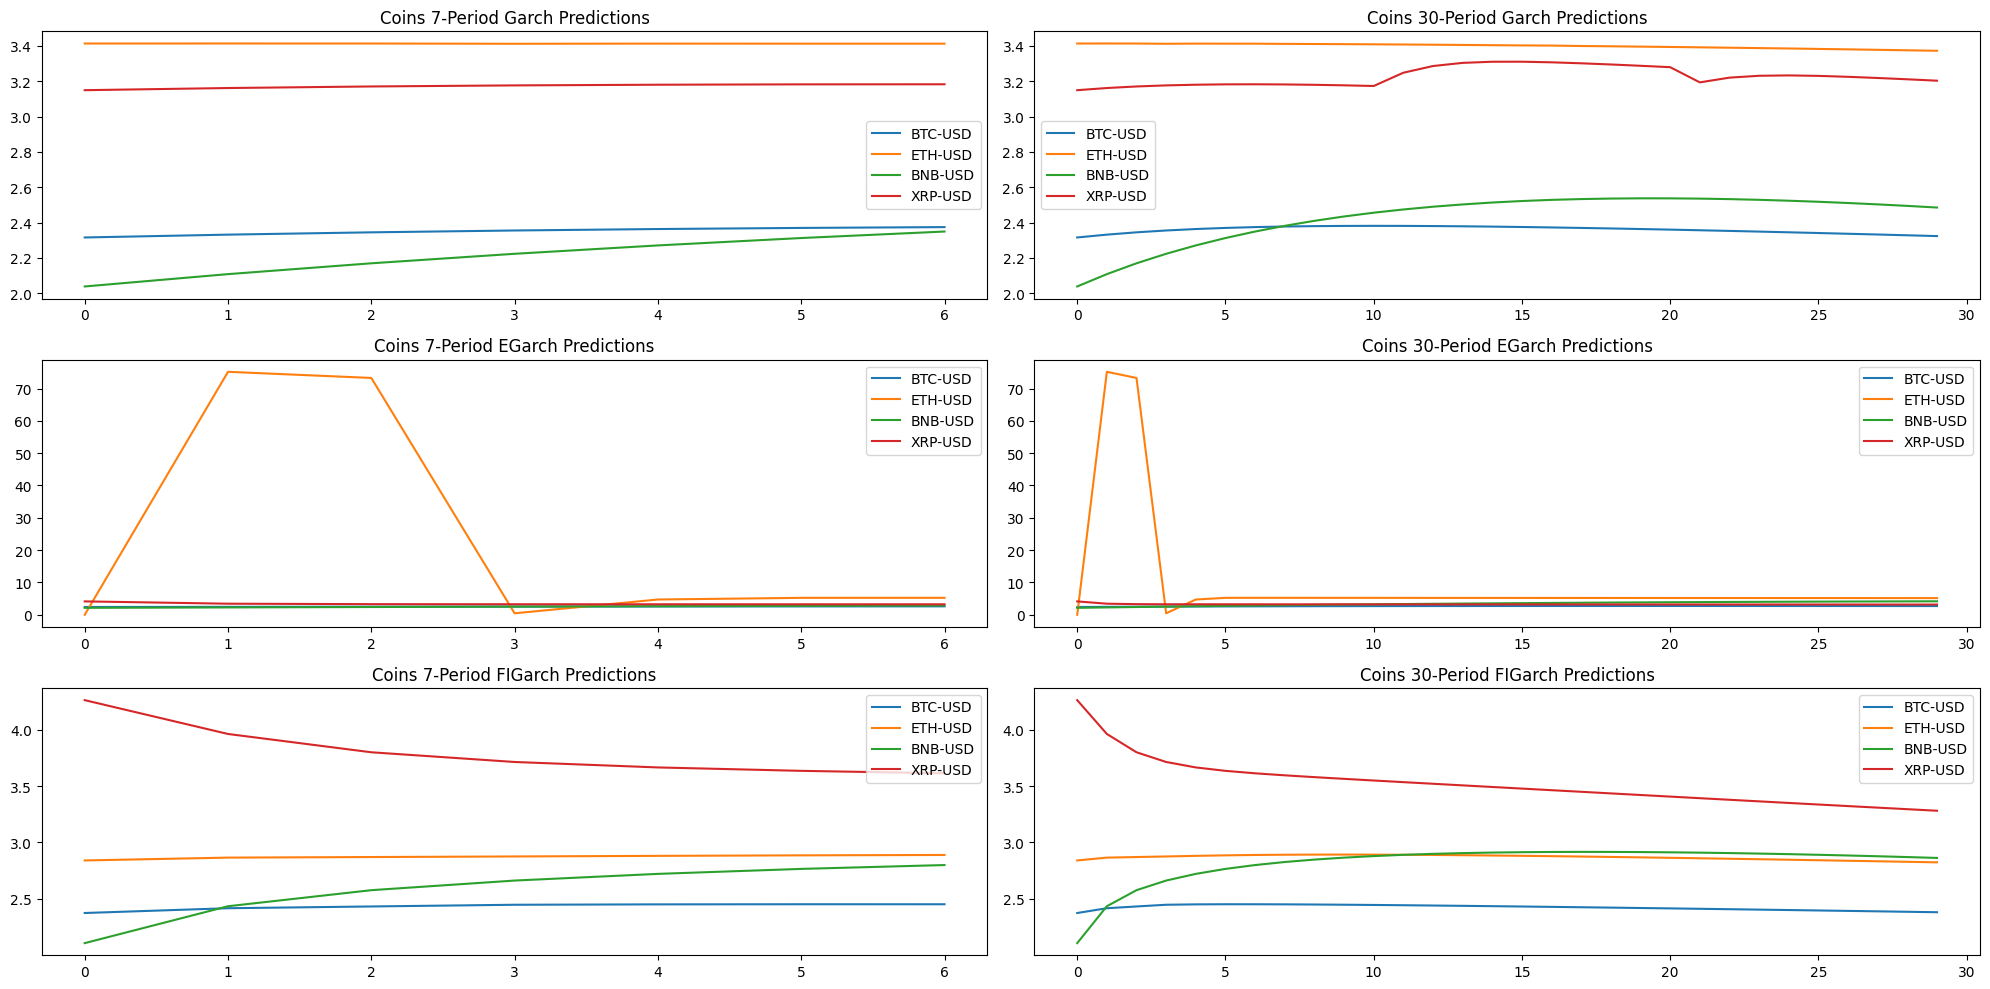

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

for coin in coins:
    axes[0, 0].plot(predicted_volatilities[7][coin]["garch"], label=f"{coin}")
    axes[0, 0].set_title("Coins 7-Period Garch Predictions")
    axes[0, 0].legend()

    axes[0, 1].plot(predicted_volatilities[30][coin]["garch"], label=f"{coin}")
    axes[0, 1].set_title("Coins 30-Period Garch Predictions")
    axes[0, 1].legend()

    axes[1, 0].plot(predicted_volatilities[7][coin]["egarch"], label=f"{coin}")
    axes[1, 0].set_title("Coins 7-Period EGarch Predictions")
    axes[1, 0].legend()

    axes[1, 1].plot(predicted_volatilities[30][coin]["egarch"], label=f"{coin}")
    axes[1, 1].set_title("Coins 30-Period EGarch Predictions")
    axes[1, 1].legend()

    axes[2, 0].plot(predicted_volatilities[7][coin]["figarch"], label=f"{coin}")
    axes[2, 0].set_title("Coins 7-Period FIGarch Predictions")
    axes[2, 0].legend()

    axes[2, 1].plot(predicted_volatilities[30][coin]["figarch"], label=f"{coin}")
    axes[2, 1].set_title("Coins 30-Period FIGarch Predictions")
    axes[2, 1].legend()

fig.tight_layout()
plt.show()

## Part 2

In [107]:
def calculate_historical_volatility(df, window):
    returns = df['Close'].pct_change()

    mean_returns = returns.rolling(window=window).mean()
    squared_deviations = (returns - mean_returns) ** 2
    rolling_sum = squared_deviations.rolling(window=window).sum()
    volatility = np.sqrt(rolling_sum / (window - 1))

    return volatility.dropna()

In [78]:
def calculate_parkinson_volatility(df, window):
    log_range_squared = np.log(df['High'] / df['Low']) ** 2
    rolling_sum = log_range_squared.rolling(window=window).sum()
    ln_factor = 4 * window * np.log(2)
    parkinson_volatility = np.sqrt(rolling_sum / ln_factor)

    return parkinson_volatility.dropna()


In [97]:
def calculate_garman_klass_volatility(df, window):
    high_low_term = np.log(df['High'] / df['Low']) ** 2
    close_open_term = np.log(df['Close'] / df['Open']) ** 2

    first_sum = high_low_term.rolling(window=window).sum() / (2 * window)
    second_sum = close_open_term.rolling(window=window).sum() * (2 * np.log(2) - 1) / window

    volatility = np.sqrt(first_sum - second_sum)

    return volatility.dropna()

In [104]:
def calculate_yang_zhang_volatility(df, window, alpha=2.0):
    overnight_return = np.log(df['Open'] / df['Close'].shift(1))

    open_to_close_return = np.log(df['Close'] / df['Open'])

    rs_volatility = np.log(df['High'] / df['Low'])

    avg_overnight_return = overnight_return.rolling(window=window).mean()
    avg_open_to_close_return = open_to_close_return.rolling(window=window).mean()

    sigma_o_squared = ((overnight_return - avg_overnight_return) ** 2).rolling(window=window).mean()
    sigma_c_squared = ((open_to_close_return - avg_open_to_close_return) ** 2).rolling(window=window).mean()

    sigma_rs_squared = (rs_volatility ** 2).rolling(window=window).mean()

    k = (alpha - 1) / (alpha + (window + 1) / (window - 1))

    yang_zhang_volatility = np.sqrt(sigma_o_squared + k * sigma_c_squared + (1 - k) * sigma_rs_squared)

    return yang_zhang_volatility.dropna()

In [86]:
train_data = data.loc[train_start:train_end]
proxies = {}

In [89]:
historical_7 = calculate_historical_volatility(train_data, window=7)
proxies["historical_7"] = historical_7

historical_30 = calculate_historical_volatility(train_data, window=30)
proxies["historical_30"] = historical_30

In [90]:
parkinson_7 = calculate_parkinson_volatility(train_data, window=7)
proxies["parkinson_7"] = parkinson_7

parkinson_30 = calculate_parkinson_volatility(train_data, window=30)
proxies["parkinson_30"] = parkinson_30

In [98]:
garman_klass_7 = calculate_garman_klass_volatility(train_data, window=7)
proxies["garman_klass_7"] = garman_klass_7

garman_klass_30 = calculate_garman_klass_volatility(train_data, window=30)
proxies["garman_klass_30"] = garman_klass_30

In [105]:
yang_zhang_7 = calculate_yang_zhang_volatility(train_data, window=7)
proxies["yang_zhang_7"] = yang_zhang_7

yang_zhang_30 = calculate_yang_zhang_volatility(train_data, window=30)
proxies["yang_zhang_30"] = yang_zhang_30

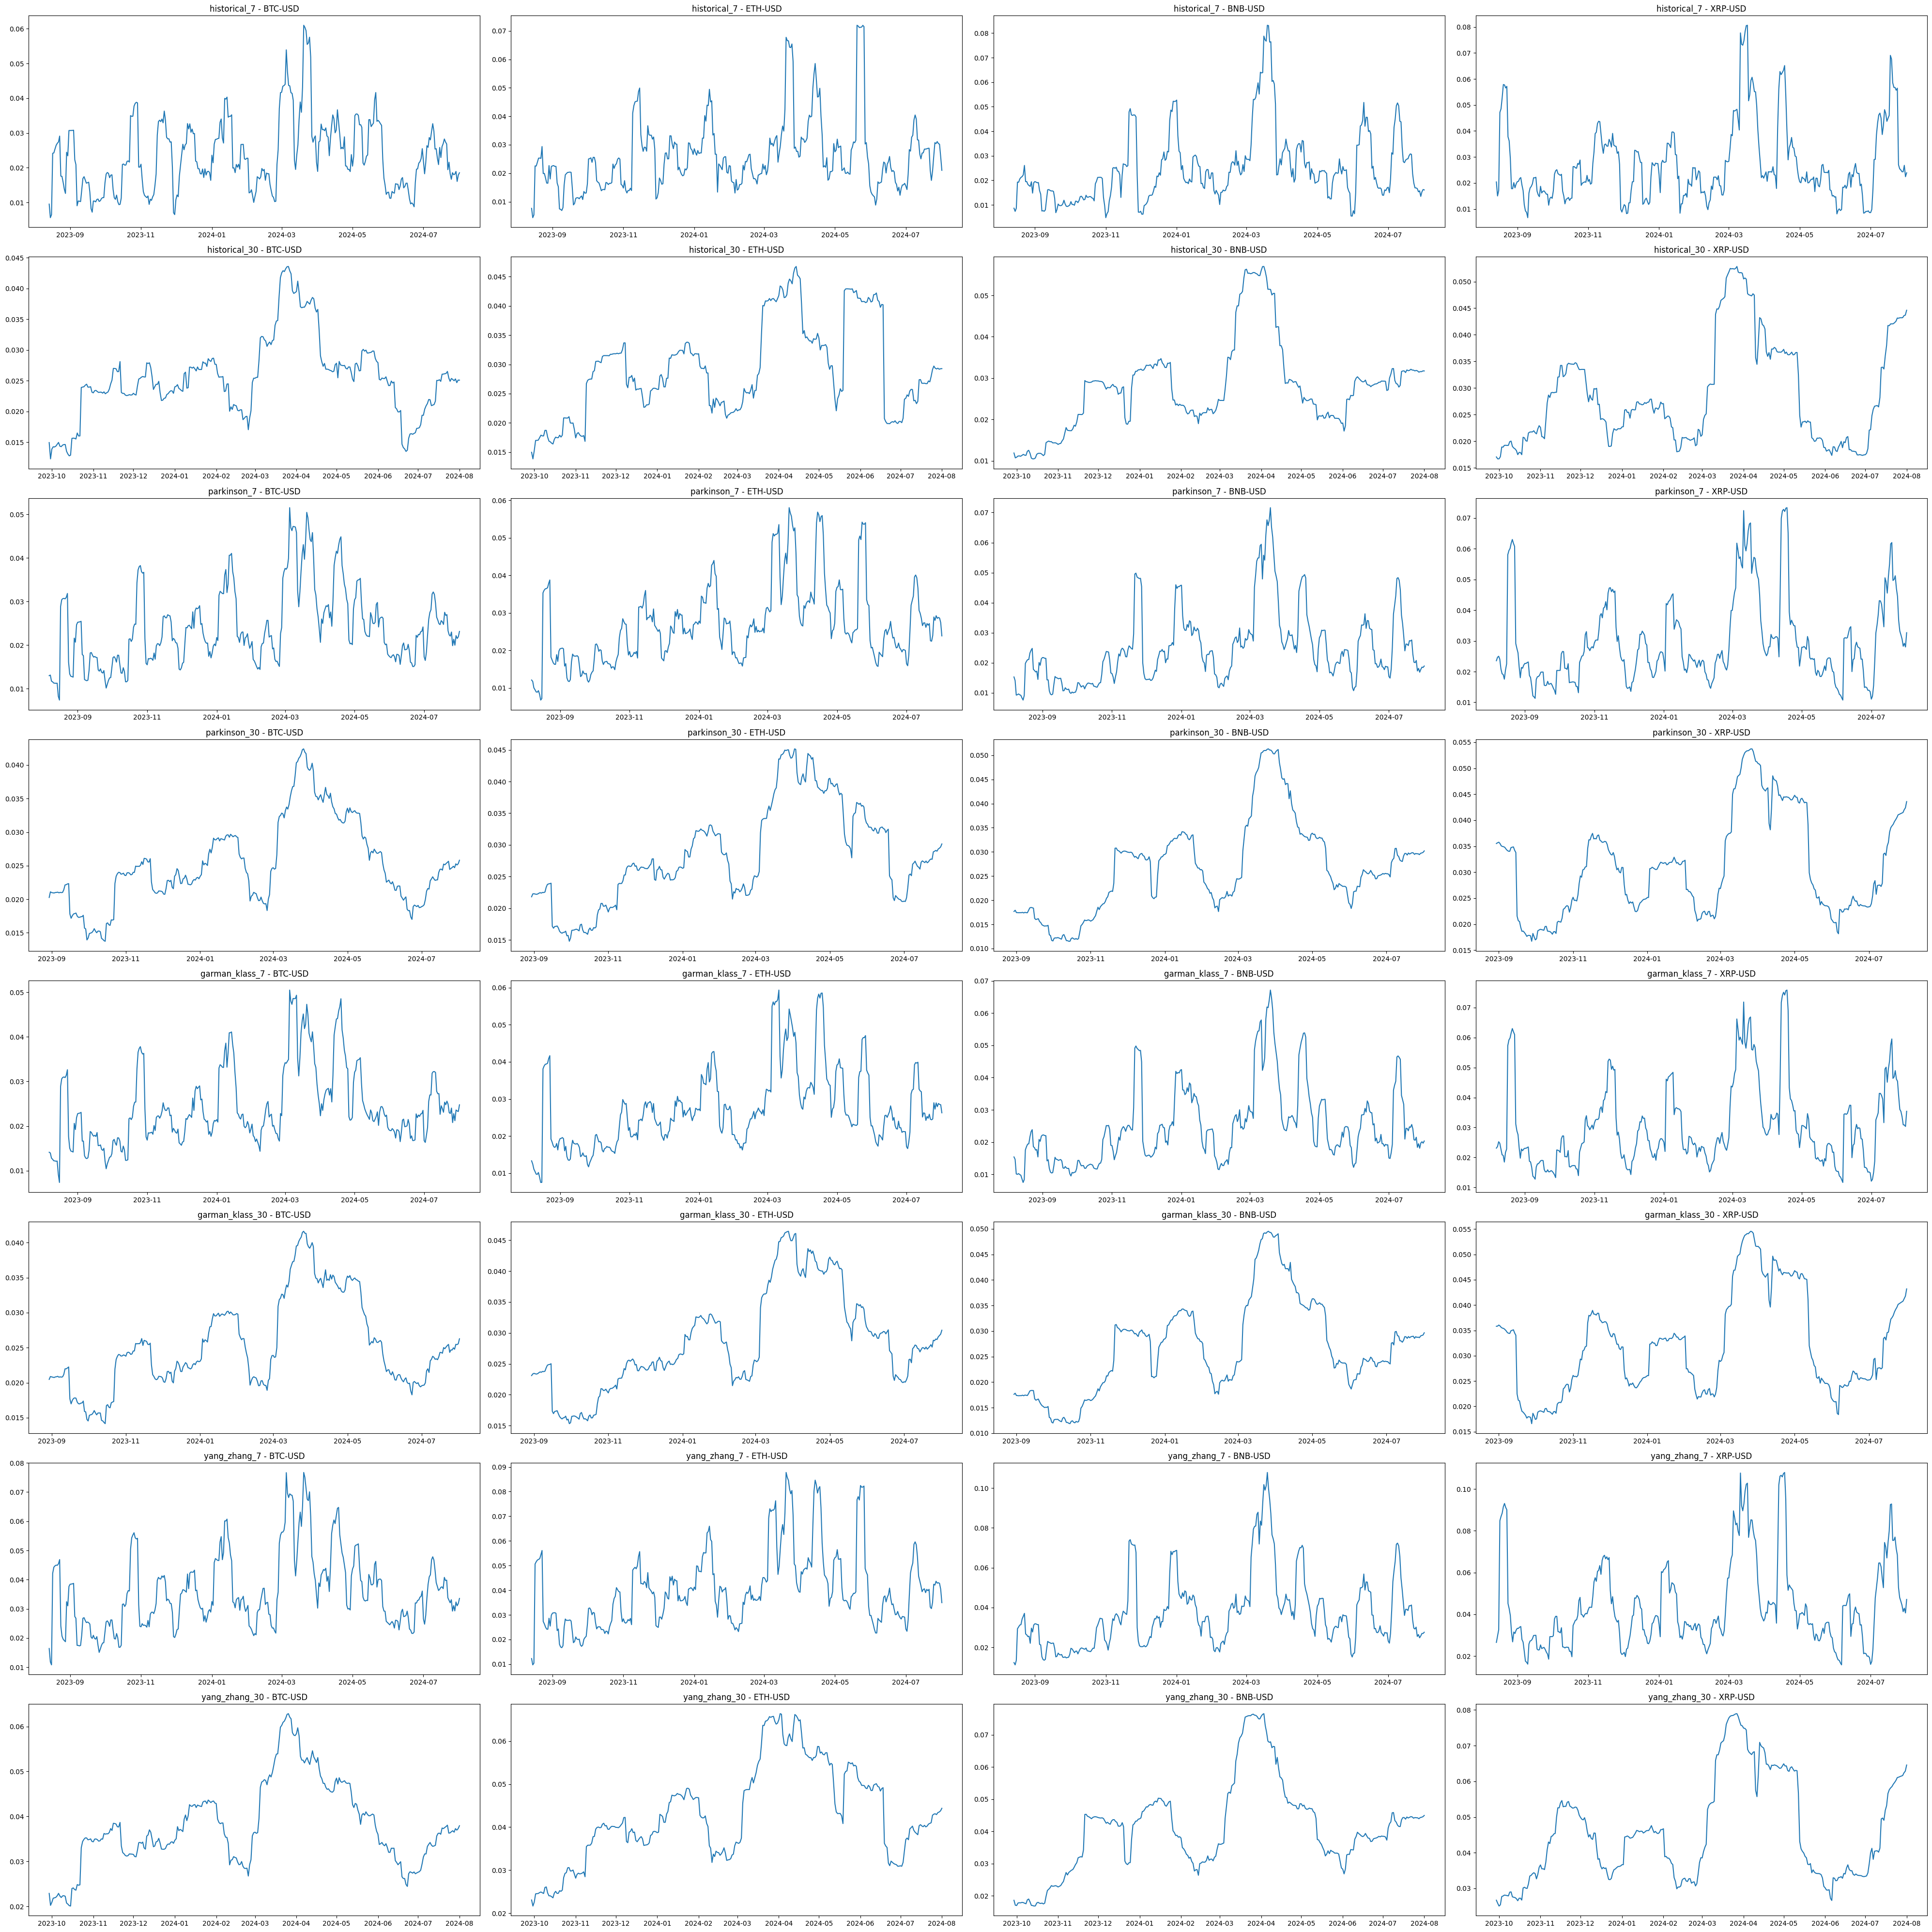

In [110]:
rows = len(proxies)
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 10, rows * 5))

for i, (proxy_name, proxy_data) in enumerate(proxies.items()):
    for j, coin in enumerate(coins):
      ax = axes[i, j] if rows > 1 else axes[j]
      ax.plot(proxy_data[coin])
      ax.set_title(f"{proxy_name} - {coin}")

plt.tight_layout()
plt.show()

# Section 3

## Part 1

In [23]:
mean_volatilities = volatilities.T.groupby(level=0).mean().T
print(mean_volatilities)

          BNB-USD   BTC-USD    ETH-USD   XRP-USD
Garch     2.32122  2.354879   3.406635   3.19969
EGarch   2.976438  2.598413  16.453652  3.331817
FIGarch  2.700759   2.42864   2.870749  3.664147
